In [2]:
library(ggplot2)
library(tidyverse)
library(hrbrthemes)
library(viridis)
library(tseries)

In [34]:
data <- read.csv("data/prep.csv")

In [35]:
data["delay_rate"] <- data$arr_del15 / data$arr_flights
data["new_delay_rate"] <- (data$arr_del15 - data$late_aircraft_ct)/(data$arr_flights - data$late_aircraft_ct)
data["new_arr_flights"] <- (data$arr_flights - data$late_aircraft_ct)
data["arr_flights_n"] = data$arr_flights / max(data$arr_flights)

In [36]:
data["jan"] <- as.numeric(data$month==1)
data["feb"] <- as.numeric(data$month==2)
data["mar"] <- as.numeric(data$month==3)
data["apr"] <- as.numeric(data$month==4)
data["may"] <- as.numeric(data$month==5)
data["jun"] <- as.numeric(data$month==6)
data["jul"] <- as.numeric(data$month==7)
data["aug"] <- as.numeric(data$month==8)
data["sep"] <- as.numeric(data$month==9)
data["oct"] <- as.numeric(data$month==10)
data["nov"] <- as.numeric(data$month==11)
data["dec"] <- as.numeric(data$month==12)

In [37]:
finiteFilter = data$delay_rate > 0 & data$delay_rate < 1

In [38]:
data["t_delay_rate"] <- log(data$delay_rate / (1-data$delay_rate))

In [39]:
data

X,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,⋯,apr,may,jun,jul,aug,sep,oct,nov,dec,t_delay_rate
<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2022,3,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley International",135,12,4.21,⋯,0,0,0,0,0,0,0,0,0,-2.3272777
1,2022,3,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",79,10,4.03,⋯,0,0,0,0,0,0,0,0,0,-1.9315214
2,2022,3,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",79,15,5.36,⋯,0,0,0,0,0,0,0,0,0,-1.4508329
3,2022,3,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",147,12,3.92,⋯,0,0,0,0,0,0,0,0,0,-2.4203681
4,2022,3,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92,21,2.72,⋯,0,0,0,0,0,0,0,0,0,-1.2181574
5,2022,3,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta International",2985,468,117.44,⋯,0,0,0,0,0,0,0,0,0,-1.6823547
6,2022,3,9E,Endeavor Air Inc.,ATW,"Appleton, WI: Appleton International",140,26,11.53,⋯,0,0,0,0,0,0,0,0,0,-1.4781019
7,2022,3,9E,Endeavor Air Inc.,AUS,"Austin, TX: Austin - Bergstrom International",58,2,0.74,⋯,0,0,0,0,0,0,0,0,0,-3.3322045
8,2022,3,9E,Endeavor Air Inc.,AVL,"Asheville, NC: Asheville Regional",47,6,0.13,⋯,0,0,0,0,0,0,0,0,0,-1.9218126



Call:
lm(formula = t_delay_rate ~ sqrt(arr_flights_n) + as.factor(airport), 
    data = data[finiteFilter, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3492 -0.3955  0.0461  0.4462  4.4521 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -1.544281   0.021431 -72.057  < 2e-16 ***
sqrt(arr_flights_n)   -0.496576   0.016453 -30.182  < 2e-16 ***
as.factor(airport)ABI  0.066437   0.048068   1.382 0.166932    
as.factor(airport)ABQ  0.050224   0.026040   1.929 0.053761 .  
as.factor(airport)ABR -0.751889   0.066633 -11.284  < 2e-16 ***
as.factor(airport)ABY  0.019336   0.050720   0.381 0.703031    
as.factor(airport)ACK  0.137802   0.061452   2.242 0.024934 *  
as.factor(airport)ACT -0.134129   0.049491  -2.710 0.006725 ** 
as.factor(airport)ACV  0.257434   0.050818   5.066 4.07e-07 ***
as.factor(airport)ACY  0.023151   0.053474   0.433 0.665063    
as.factor(airport)ADK  0.406377   0.056609   7.179 7.06e-13 ***
as.factor(ai

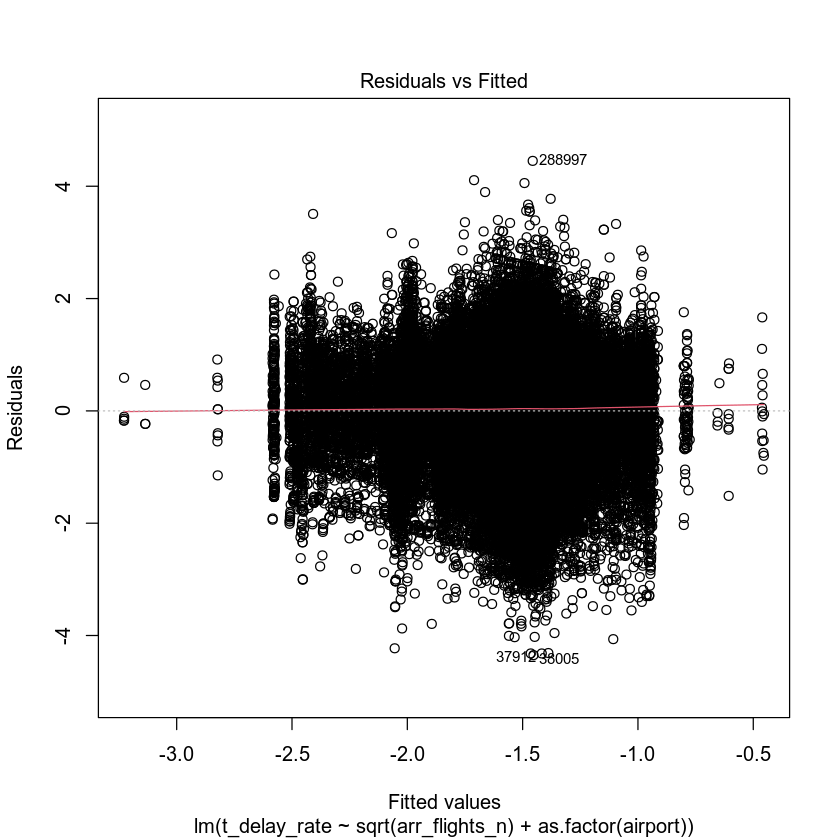

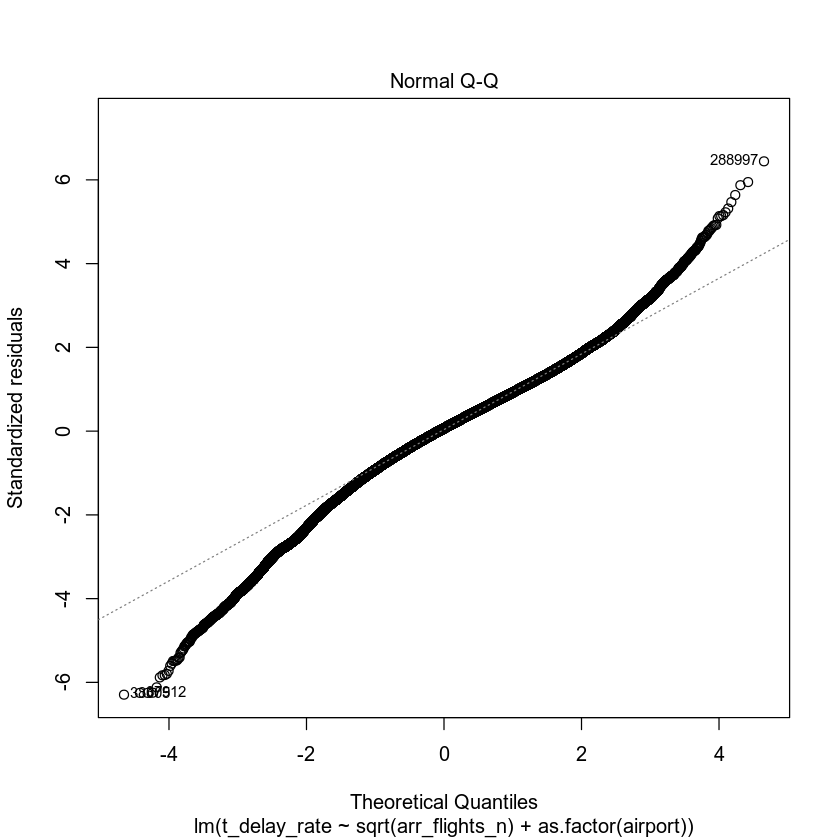

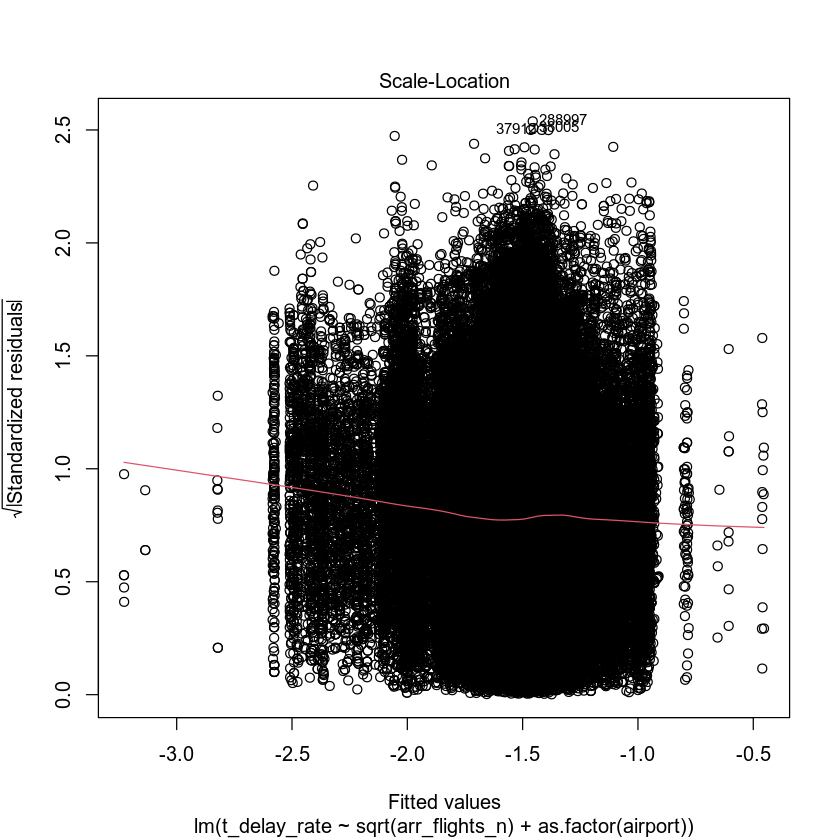

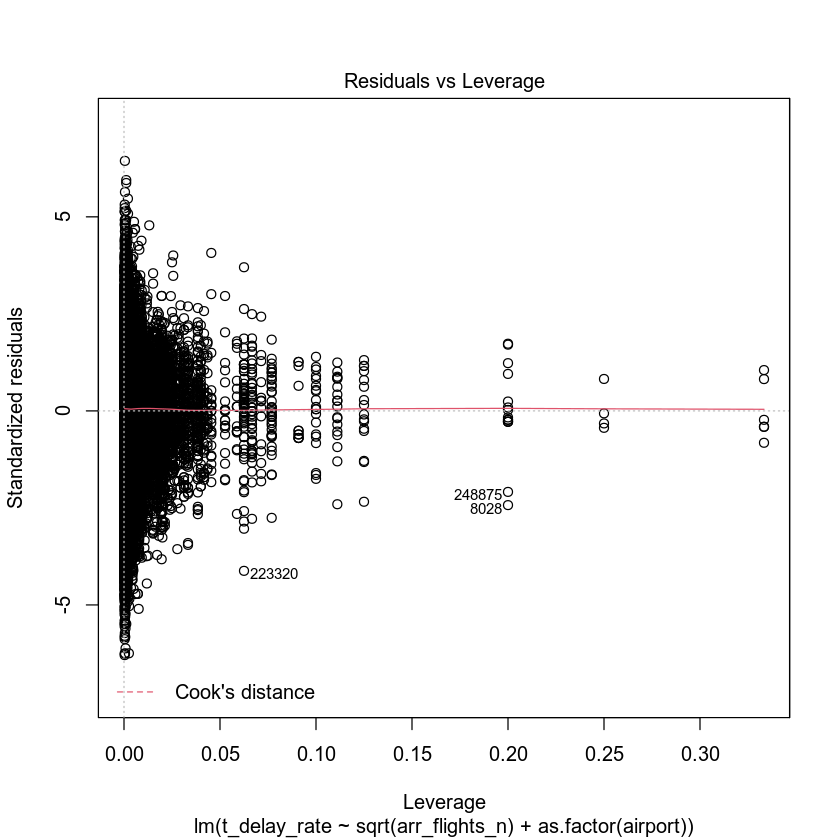

In [49]:
m<-lm(t_delay_rate~sqrt(arr_flights_n)+as.factor(airport),data=data[finiteFilter,])

summary(m)
plot(m)

In [50]:
jarque.bera.test(m$residuals)


	Jarque Bera Test

data:  m$residuals
X-squared = 25936, df = 2, p-value < 2.2e-16


In [52]:
m<-MASS::rlm(t_delay_rate~sqrt(arr_flights_n)+as.factor(airport)+as.factor(carrier),data=data[finiteFilter,])

summary(m)
m_ac <- m


Call: rlm(formula = t_delay_rate ~ sqrt(arr_flights_n) + as.factor(airport) + 
    as.factor(carrier), data = data[finiteFilter, ])
Residuals:
    Min      1Q  Median      3Q     Max 
-4.4433 -0.4050  0.0164  0.4053  4.3963 

Coefficients:
                      Value    Std. Error t value 
(Intercept)            -1.8134   0.0205   -88.3203
sqrt(arr_flights_n)    -0.6059   0.0165   -36.6191
as.factor(airport)ABI  -0.0342   0.0444    -0.7700
as.factor(airport)ABQ   0.0433   0.0241     1.7992
as.factor(airport)ABR  -0.7317   0.0615   -11.8912
as.factor(airport)ABY  -0.0957   0.0468    -2.0427
as.factor(airport)ACK   0.0839   0.0568     1.4774
as.factor(airport)ACT  -0.2606   0.0457    -5.6967
as.factor(airport)ACV   0.3317   0.0470     7.0574
as.factor(airport)ACY   0.0296   0.0496     0.5981
as.factor(airport)ADK   0.6028   0.0527    11.4449
as.factor(airport)ADQ  -0.1231   0.0475    -2.5921
as.factor(airport)AEX  -0.0925   0.0337    -2.7448
as.factor(airport)AGS  -0.0075   0.0345    -0

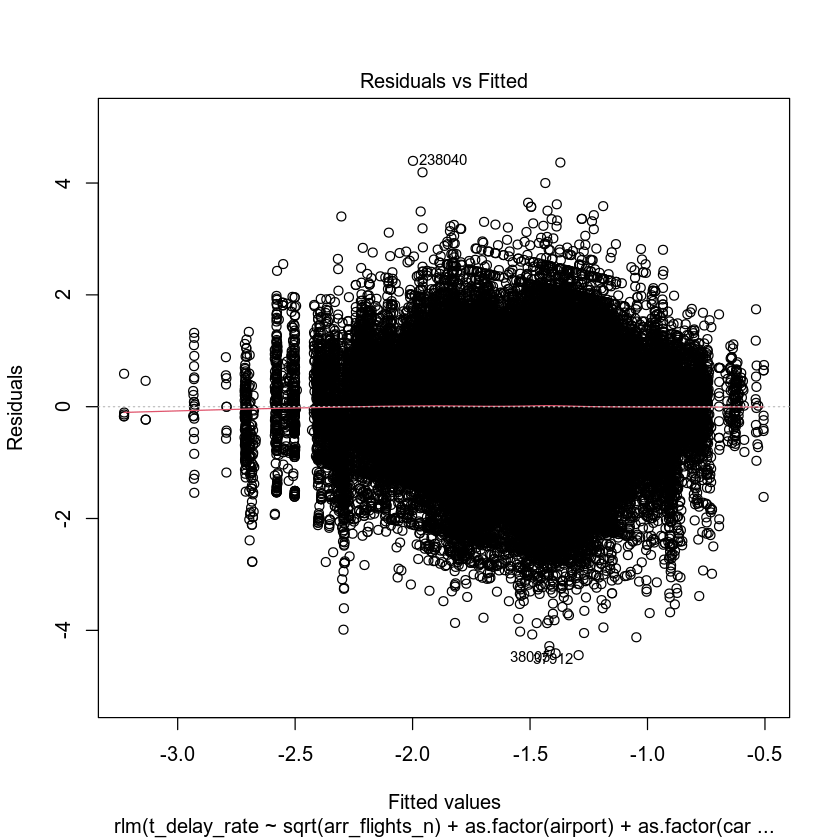

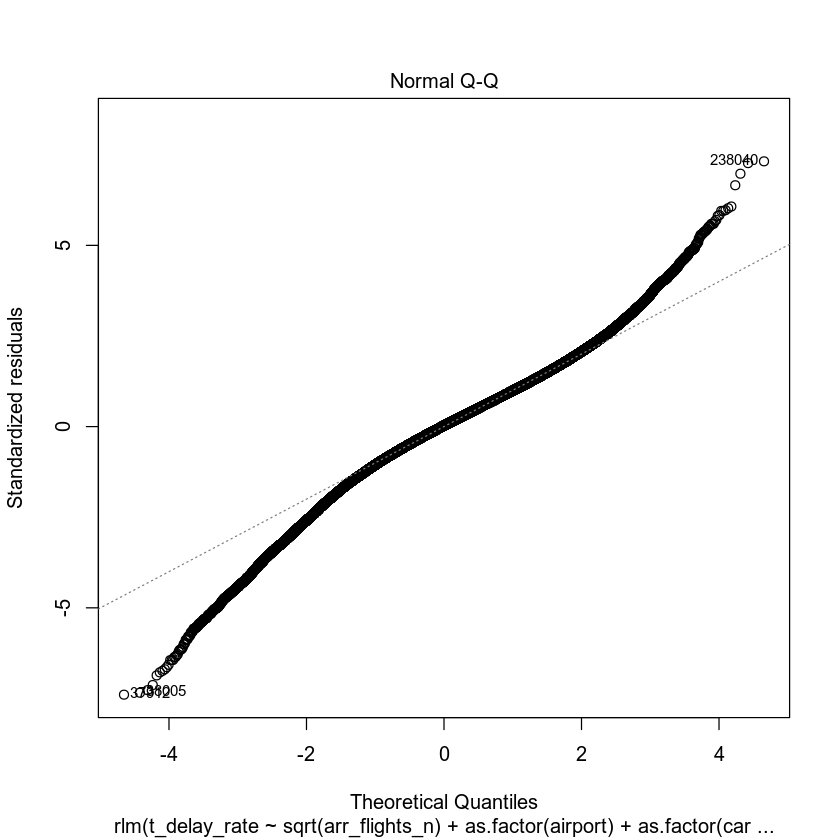

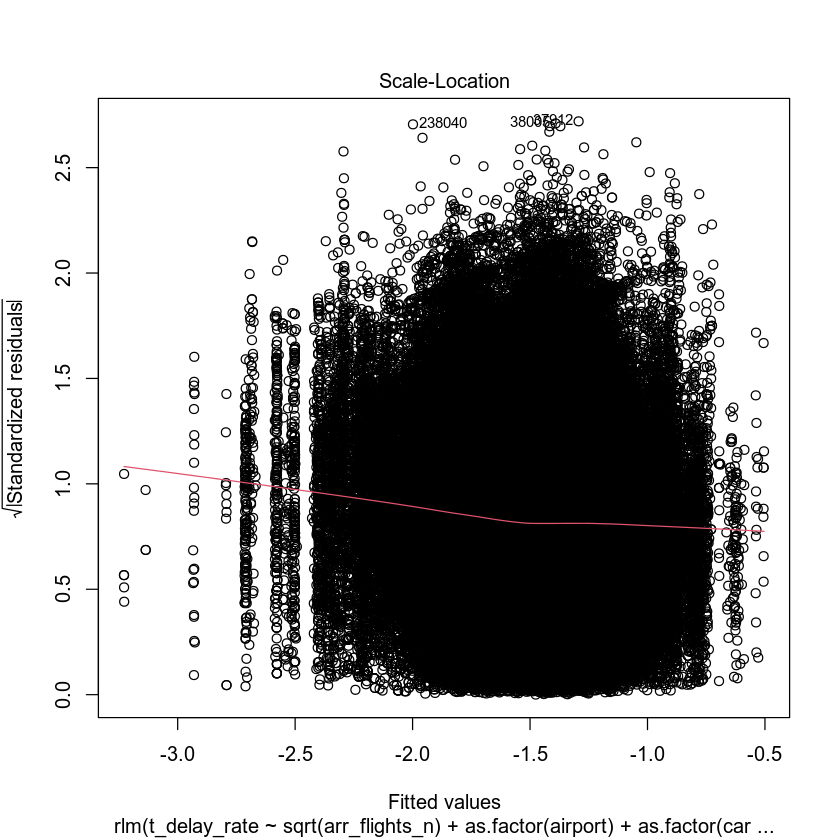

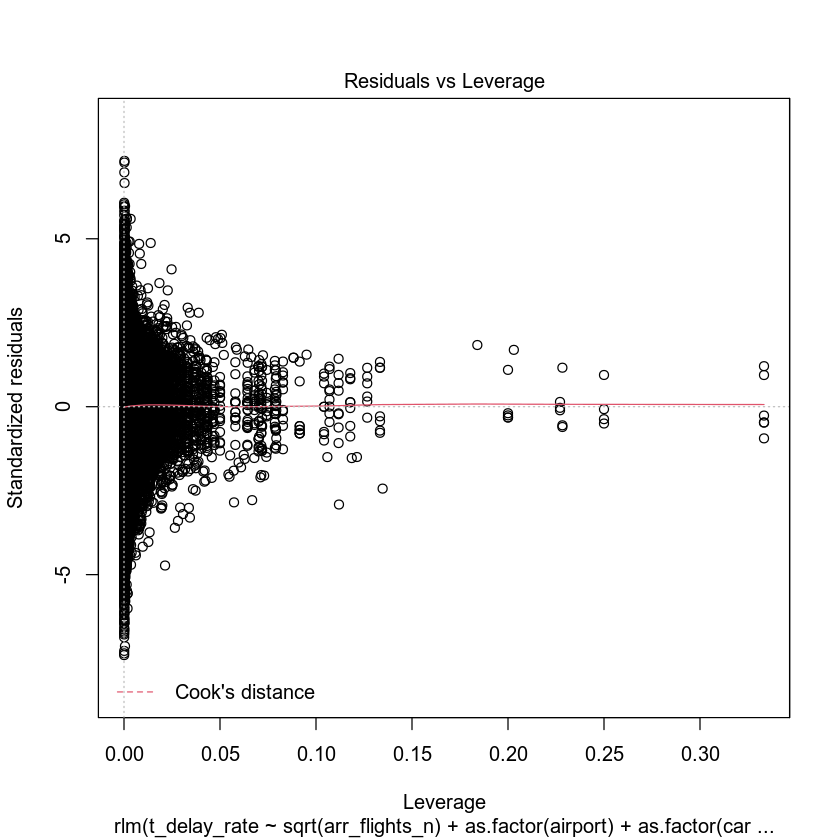

In [53]:
plot(m_ac)